# Case Study on Loan Prediction Analysis

In [459]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [460]:
# Import the numpy, pandas, seaborn packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [461]:
# Read the csv file using 'read_csv'

loan = pd.read_csv('application_data.csv')
loan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [462]:
loan.shape

(307511, 122)

In [463]:
loan1 = loan.copy

### Data Cleaning activity

In [464]:
def col_null_percent():
  col_null_percent = round((100*loan.isnull().sum()/len(loan.index)),2)
  print(col_null_percent)

col_null_percent()

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64


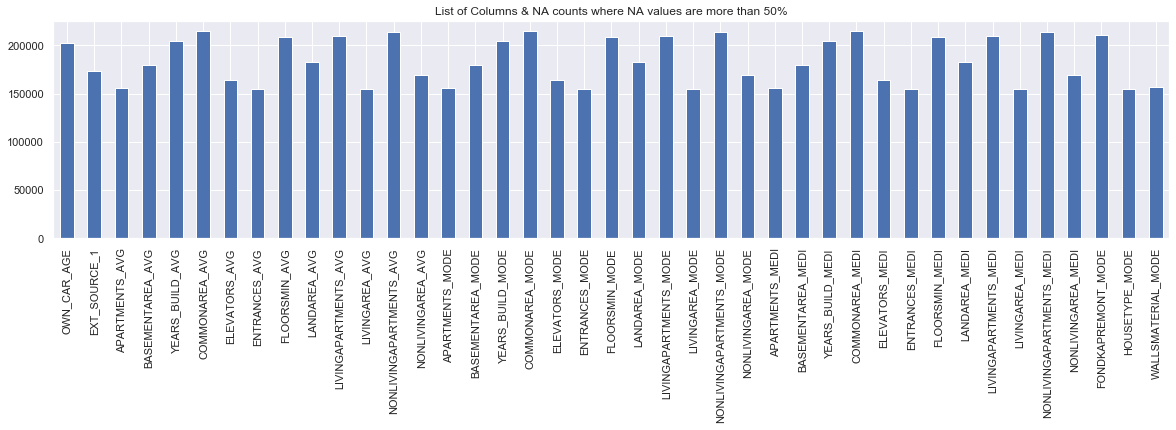

In [466]:
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.5*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()


In [467]:
##Let us remove all the columns having null values more than 50%

def removeNulls(dataframe, axis =1, percent=0.5):

    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [468]:
loan = removeNulls(loan, axis =1,percent = 0.5)

Number of Columns dropped	:  41

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 81)


In [469]:
#Also there are few irrelevenat column which doesn't make sense for analysing the loan dataset. So let us directly drop them.

##### Dropping Unnecessary Columns:

- REGION_POPULATION_RELATIVE
- FLAG_EMP_PHONE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- EXT_SOURCE_2
- EXT_SOURCE_3
- YEARS_BEGINEXPLUATATION_AVG
- FLOORSMAX_AVG
- YEARS_BEGINEXPLUATATION_MODE
- FLOORSMAX_MODE
- YEARS_BEGINEXPLUATATION_MEDI
- FLOORSMAX_MEDI
- TOTALAREA_MODE
- EMERGENCYSTATE_MODE
- DAYS_LAST_PHONE_CHANGE
- SK_ID_PREV
- WEEKDAY_APPR_PROCESS_START

In [470]:
unnecessary_columns = ['REGION_POPULATION_RELATIVE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
loan.drop(labels = unnecessary_columns, axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (307511, 33) rows & columns.


In [471]:
#Now lets check the reamaining columns again

loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [472]:
#For the remaining columns lets find null values

round(100*(loan.isnull().sum()/len(loan.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
R

In [473]:
round(loan.OCCUPATION_TYPE.isnull().sum()/len(loan)*100,2)

##Null values are around 31%

31.35

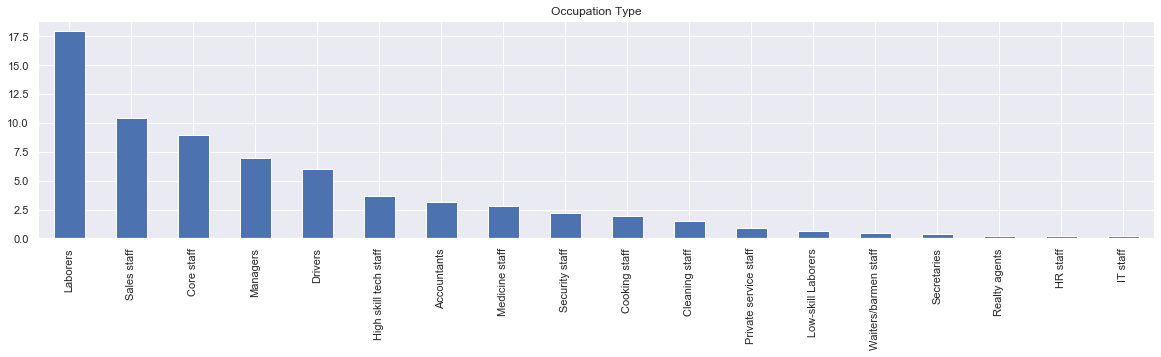

In [474]:
Occupation_type = loan['OCCUPATION_TYPE'].value_counts()*100/len(loan)
plt.figure(figsize=(20,4))
Occupation_type.plot(kind='bar')
plt.title('Occupation Type')
plt.show()

##We can impute the null values with 'others', since the occupation is unknown for them.

In [475]:
round(loan.NAME_TYPE_SUITE.isnull().sum()/len(loan)*100,2)

0.42

In [476]:
loan['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

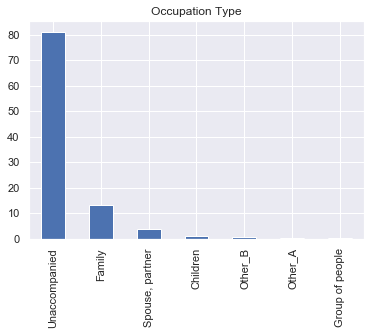

In [477]:
Name_Type_Suite= loan['NAME_TYPE_SUITE'].value_counts(normalize=True)*100
Name_Type_Suite.plot(kind='bar')
plt.title('Occupation Type')
plt.show()

##Null values are only 0.42% and around 81% values are unaccompanied, so we can impute the null values with Unaccompanied

In [478]:
round(loan.AMT_GOODS_PRICE.isnull().sum()/len(loan)*100,2)

#So amount goods price has only 0.09% missing values so we can impute it with mean/median. 
#But for that we will need to check if it has any outliers.

0.09

In [479]:
loan['AMT_GOODS_PRICE'].describe()

#As we can see max count and average are widely distributed and there's a huge difference between the two. 
#So we cannot directly impute it with mean

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

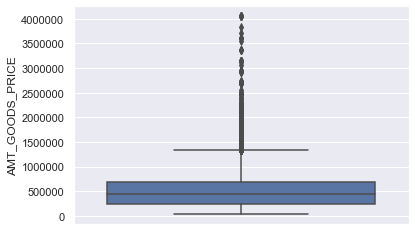

In [481]:
#Lets check with the help of Box plot

sns.boxplot(y=loan['AMT_GOODS_PRICE'], width = 0.8)

#As we can see that outliers range is large so we shoudl either remove the outliers and perform the mean operation on remaining values.
#Or we should just fill the null values with median.

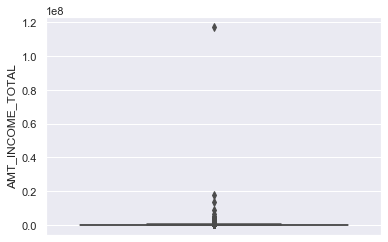

In [482]:
sns.boxplot(y=loan['AMT_INCOME_TOTAL'], width = 0.8)

##As we can see there are outliers in Annual income, one way of handling is by ignoring top 10% values, so it doesn't effects the mean range. 

In [483]:
#We can take 90% values to remove outliers

In [484]:
loan['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

### Dervied Metrics

#### We will now derive some new columns based on our business understanding that will be helpful in our analysis.
#### Binning values which are in the form of Continous Variables

In [485]:
##Creating bins for range of loan amount

bins = [0, 100000,250000,500000,1000000,10000000]
slot = ['0-100K', '100K-250K','250K-500K','500K-1M','1M and above']
loan['AMT_CREDIT_RANGE'] = pd.cut(loan['AMT_CREDIT'], bins, labels=slot)

In [486]:
##Creating bins for range of Anuual income

bins = [0, 50000, 100000,250000,500000,10000000]
slot = ['0-50K', '50K-100K', '100K-250K','250K-500K','500K and above']
loan['ANNUAL_INCOME_RANGE'] = pd.cut(loan['AMT_INCOME_TOTAL'], bins, labels=slot)

In [487]:
##Creating bins for range of Annuity

bins = [0,15000,30000,50000,300000]
slot = ['0-15K','15K-30K', '30K-50K' ,'50K and above']
loan['AMT_ANNUITY_RANGE'] = pd.cut(loan['AMT_ANNUITY'], bins, labels=slot)

In [488]:
loan['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100

500K-1M         35.183457
250K-500K       29.311147
100K-250K       17.298243
1M and above    16.254703
0-100K           1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

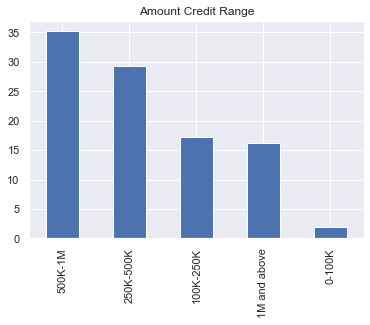

In [489]:
Amt_Credit_Range= loan['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100
Amt_Credit_Range.plot(kind='bar')
plt.title('Amount Credit Range')
plt.show()

##As we can see that 35% of our clients have granted loan in range of 500K-1M and very few have taken loan under 100K

In [490]:
loan['ANNUAL_INCOME_RANGE'].value_counts(normalize = True)*100

100K-250K         66.351119
50K-100K          19.245353
250K-500K         12.056922
0-50K              1.468905
500K and above     0.877701
Name: ANNUAL_INCOME_RANGE, dtype: float64

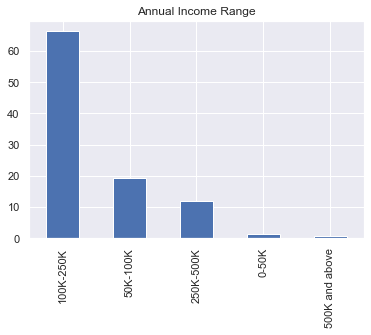

In [491]:
Ann_Inc_Range= loan['ANNUAL_INCOME_RANGE'].value_counts(normalize=True)*100
Ann_Inc_Range.plot(kind='bar')
plt.title('Annual Income Range')
plt.show()

##As we can see that 60% of our clients lies in range of 100-250K annual salary

In [492]:
loan['AMT_ANNUITY_RANGE'].value_counts(normalize = True)*100

15K-30K          43.997216
30K-50K          28.367897
0-15K            20.709010
50K and above     6.925876
Name: AMT_ANNUITY_RANGE, dtype: float64

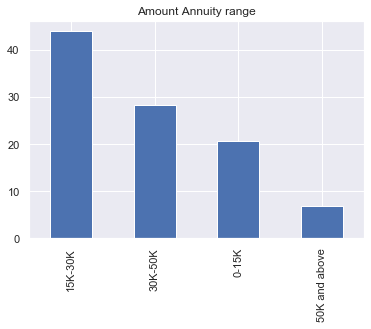

In [493]:
Amm_Annuity_Range= loan['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100
Amm_Annuity_Range.plot(kind='bar')
plt.title('Amount Annuity range')
plt.show()

##As we can see that around 45% of clients pays Annuality of 15-30K yearly

In [494]:
##Let us try to analyze DAYS_BIRTH, as we can see that numbers are in negative which means days before birth.

loan['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [495]:
loan['DAYS_BIRTH'] = loan['DAYS_BIRTH'].abs()
loan.DAYS_BIRTH

##To calculate age we have taken the absolute values and now dividing it by 365 to find average age.

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [496]:
loan['AGE'] = round(loan['DAYS_BIRTH']/365,1)
loan['AGE'].describe()

##The average age of person taking loans is 44, Let us also bin this values for better understanding 

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: AGE, dtype: float64

In [497]:
##Creating bins for range of Anuual income

bins = [0, 25, 30,40,50,60,100]
slot = ['0-25', '25-30', '30-40','40-50','50-60','60 and above']
loan['AGE_RANGE'] = pd.cut(loan['AGE'], bins, labels=slot)

In [498]:
loan['AGE_RANGE'].value_counts(normalize = True)*100

##We can see that half of the loan takers are of 30-50 years of age.

30-40           26.768148
40-50           24.878460
50-60           22.134818
60 and above    11.458452
25-30           10.740429
0-25             4.019694
Name: AGE_RANGE, dtype: float64

#### Changing Datatypes 

In [499]:
##Changing the datatype of Y/N (string) as Boolean for Users who own cars.

loan.FLAG_OWN_CAR.replace(('Y', 'N'), (1, 0), inplace=True)
loan['FLAG_OWN_CAR'] = loan['FLAG_OWN_CAR'].astype(bool)

In [500]:
##Changing the datatype of Y/N (string) as Boolean for Users who own properties.

loan.FLAG_OWN_REALTY.replace(('Y', 'N'), (1, 0), inplace=True)
loan['FLAG_OWN_REALTY'] = loan['FLAG_OWN_REALTY'].astype(bool)

In [522]:
loan.shape

(307511, 38)

### Analysis of the Dataset

In [501]:
loan['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Let us divide the Dataset into 2 different DFs, Target=0 and Target=1 (where 1 is Defaulters and 0 is Re-payers)

In [502]:
default = loan[loan["TARGET"]==1]
non_default = loan[loan["TARGET"]==0]

In [503]:
loan.nunique().sort_values()

##This helps us to divide columns into categorical and continous variables

REG_CITY_NOT_LIVE_CITY              2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
FLAG_MOBIL                          2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_ANNUITY_RANGE                   4
ANNUAL_INCOME_RANGE                 5
NAME_EDUCATION_TYPE                 5
AMT_CREDIT_RANGE                    5
AGE_RANGE                           6
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [504]:
def univariate(df,col,vartype,charttype,hue =None):
 
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=1,figsize=(20,8))
        if charttype == 'dist':
            ax.set_title("Distribution Plot")
            sns.distplot(df[col])
        if charttype == 'violin':
            ax.set_title("Violin Plot")
            #ax.get_xaxis().get_major_formatter().set_useOffset(False)
            sns.violinplot(data =df, x=col, inner="quartile")
        if charttype == 'box':
            ax.set_title("Box Plot")
            sns.boxplot(data =df, x=col,orient='v')
    
    if vartype == 1:
        if charttype=='bar':
            temp = pd.Series(data = hue)
            fig, ax = plt.subplots()
            width = len(df[col].unique()) + 6 + 4*len(temp.unique())
            fig.set_size_inches(width , 7)
            ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
            if len(temp.unique()) > 0:
                for p in ax.patches:
                    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
            else:
                for p in ax.patches:
                    ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
            del temp
    else:
        exit
        
    plt.show()

#### 1. Univariate Analysis

#### Continous Variables

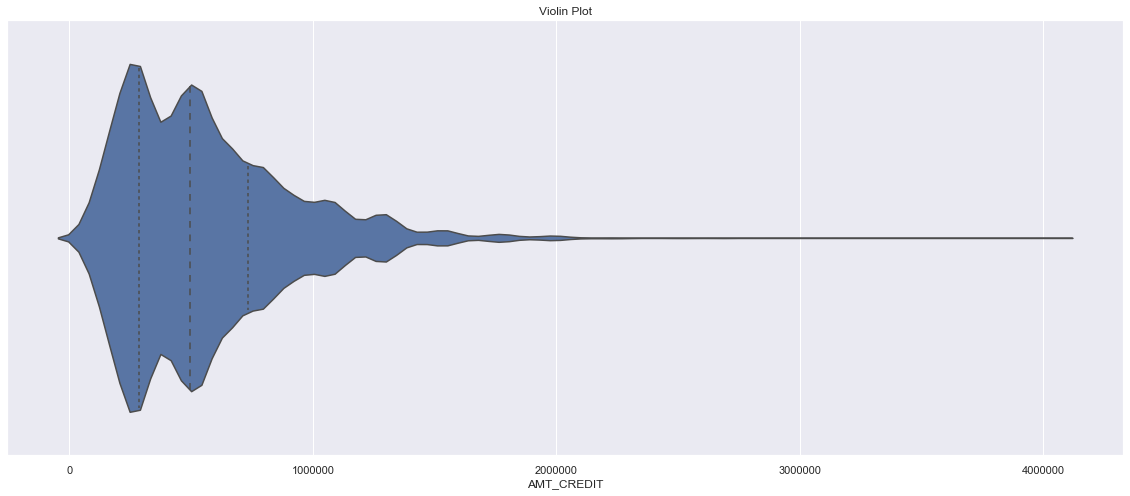

In [505]:
univariate(df=default,col='AMT_CREDIT',charttype='violin',vartype=0)

    As we can see that most of the credited loan amount are distributed between 400K-750K $ for defaulters

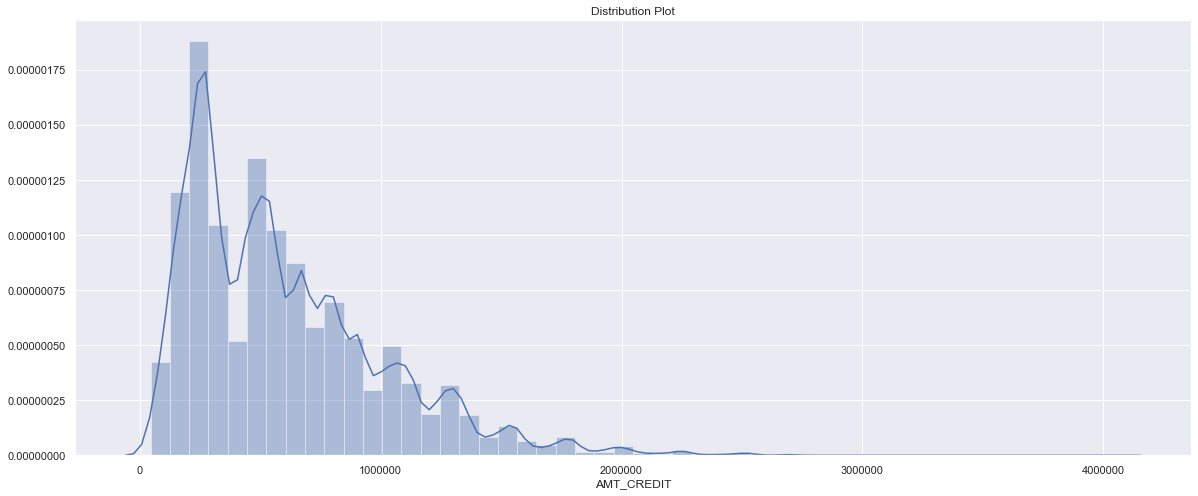

In [506]:
univariate(df=non_default,col='AMT_CREDIT',charttype='dist',vartype=0)

    As we can see that most of the credited loan amount are distributed between 450K-800K $ for non-defaulters

#### Categorical Variables

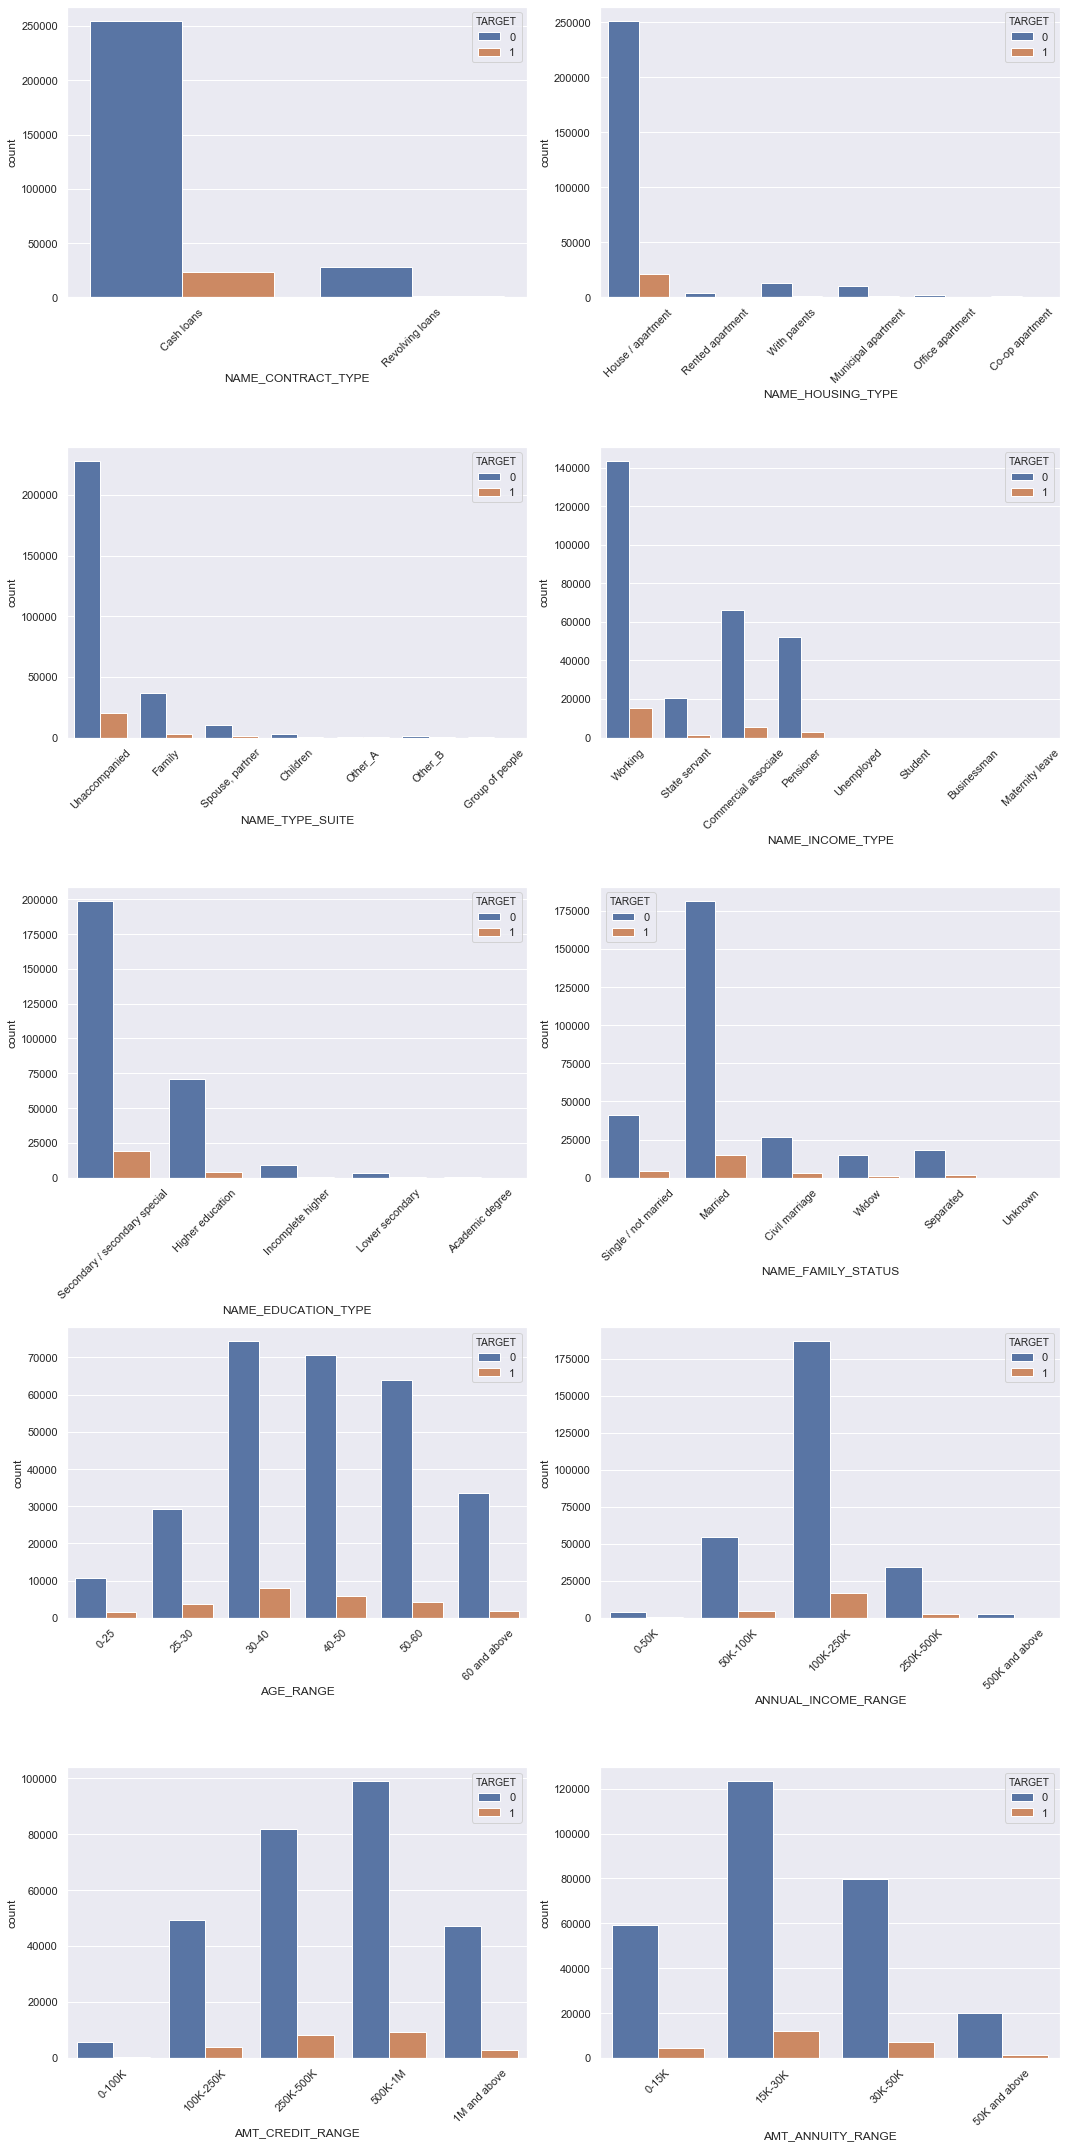

In [507]:
features = ['NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
           'AGE_RANGE','ANNUAL_INCOME_RANGE','AMT_CREDIT_RANGE','AMT_ANNUITY_RANGE']
plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = loan)
    plt.xticks(rotation = 45)
    plt.tight_layout()

- As we can clearly see that people with Cash loans have more chances of getting defaulted

- People living in Housing has maximum chances of defaulting as compare to people living in other type of accomodation

- As we can see that chances of not defaulting the loans become higher if loan taker has family in compare to the Unaccompanied defaulters. Also it is noted that most of the loans are taken by unaccompanied customers.

- It is observed that working populations are one with highest defaulters as well as non-defaulters

- For Education type, it is noticed that as the level of education increases, there are less chances of people getting defaulted

- For Family Status, Married people has highest number of defaulters as well as Non-defaulters

- It is noticed that, Age Range plot resembles a normal distribution, having range of 30-50 years with maxium Non-defaulters and defaulters.

- For Income Range, there is a sharp spike for income range of 100K-250K for both defaulters and non-defaulters

- Regarding Credit Range, there are no defaulters in the range of 0-100K and high number of defaulters in range of 500K-1M. 

- Regarding Annuity, it looks like that it follows a Normal distribution having maximum defaulters and Non-defaulters in the range of 15K-30. Also, it is observed that there are few defaulters above 50K range. 

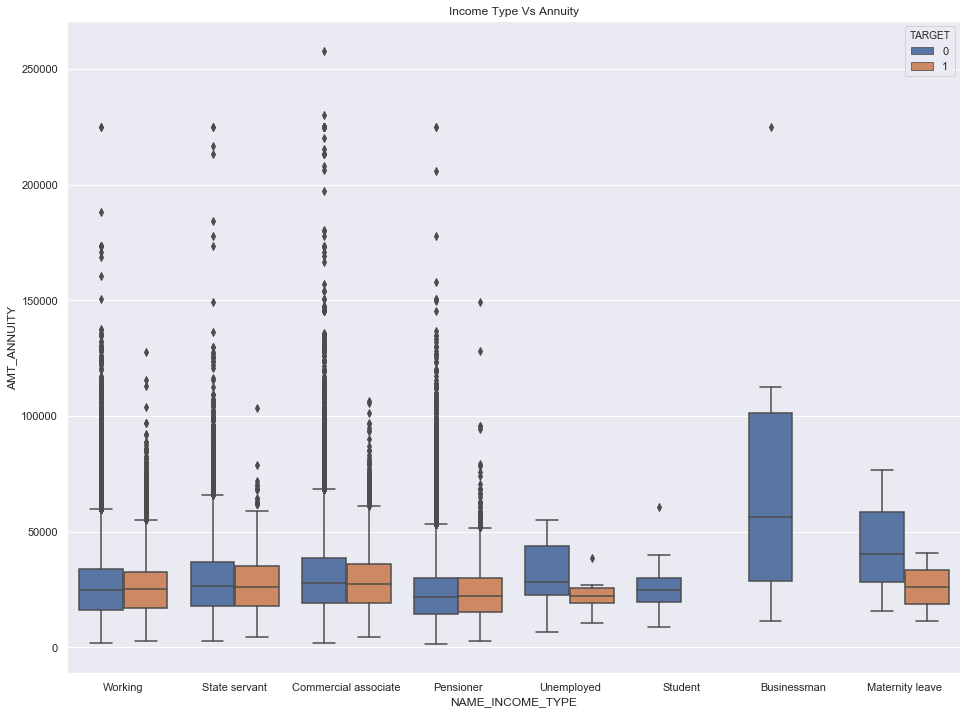

In [508]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='NAME_INCOME_TYPE', y='AMT_ANNUITY', hue ='TARGET')
plt.title('Income Type Vs Annuity')
plt.show()

We have plotted box plots for Income Type Vs Annuity, It is observed that for Working, State servant, Commercial associate and Pensioner have almost equal level of distribution for Defaulters and Non-defaulters. Whereas, for Unemployed, Average amount of Annuity paid by Non-defaulters is more than average amount of Annuity paid by defaulters and For Maternity, it is seen that the lesser the amount of annuity, more are the chances of getting default. 

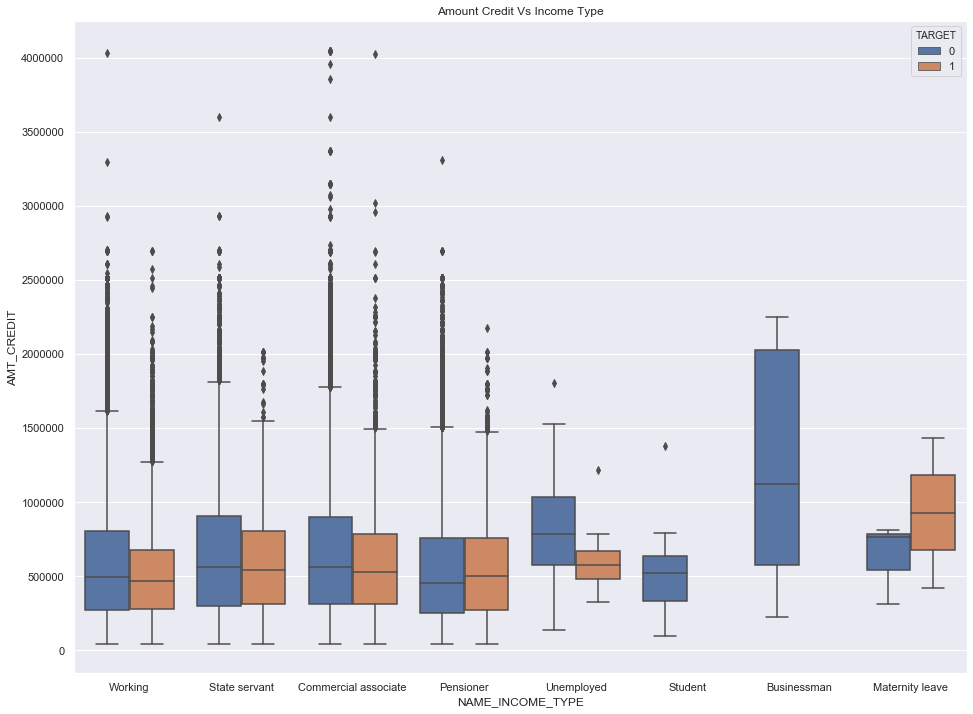

In [509]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='NAME_INCOME_TYPE', y='AMT_CREDIT', hue ='TARGET')
plt.title('Amount Credit Vs Income Type')
plt.show()

For Income Type Vs Amount Credit, it is observed that for Students and Businessman, there are no defaulters found and for Maternity Category, the number of defaulters increases with credit amount and decreases with Annuity amount.

#### 2. Multivariate Analysis

In [510]:
##Corelation for imp continous variables

default_multi = default[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
default_multi = default_multi.copy()

non_default_multi = non_default[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
non_default_multi = non_default_multi.copy()

In [511]:
##Corelation for all defaulter's continous variable

default.corr()

corr = default.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
609,AGE,DAYS_BIRTH,1.00,1.00
206,AMT_GOODS_PRICE,AMT_CREDIT,0.98,0.98
415,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96,0.96
354,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89,0.89
519,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85,0.85
597,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78,0.78
207,AMT_GOODS_PRICE,AMT_ANNUITY,0.75,0.75
181,AMT_ANNUITY,AMT_CREDIT,0.75,0.75
259,DAYS_EMPLOYED,DAYS_BIRTH,0.58,0.58
610,AGE,DAYS_EMPLOYED,0.58,0.58


In [512]:
loan_default_correlation = default_multi.corr()
loan_default_correlation

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000


(4.0, 0.0)

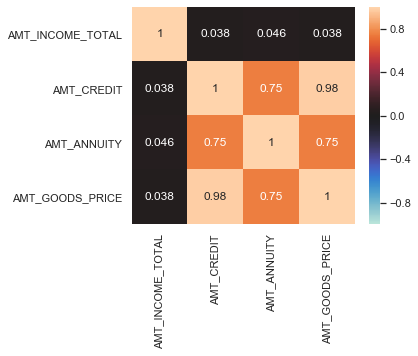

In [513]:
fig, ax = plt.subplots(figsize=(5,4))         # Sample figsize in inches
sns.heatmap(default_multi.corr(), annot = True, ax=ax,vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

For Defaulters, it is observed that Amounts Good price has the highest level of correlation with Amount Credit whereas Amount Income total has lowest level of correlation with every other variables.

In [514]:
loan_non_default_correlation = non_default_multi.corr()
loan_non_default_correlation

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000


(4.0, 0.0)

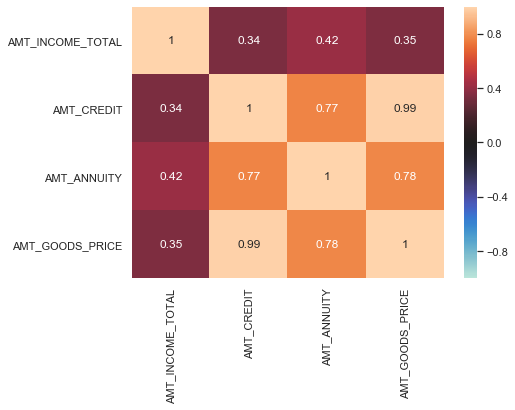

In [515]:
fig, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(non_default_multi.corr(), annot = True, ax=ax,vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

For Non-Defaulters, it is again observed that Amounts Good price has the highest level of correlation with Amount Credit whereas Amount Income total has moderate level of correlation with other 3 variables.

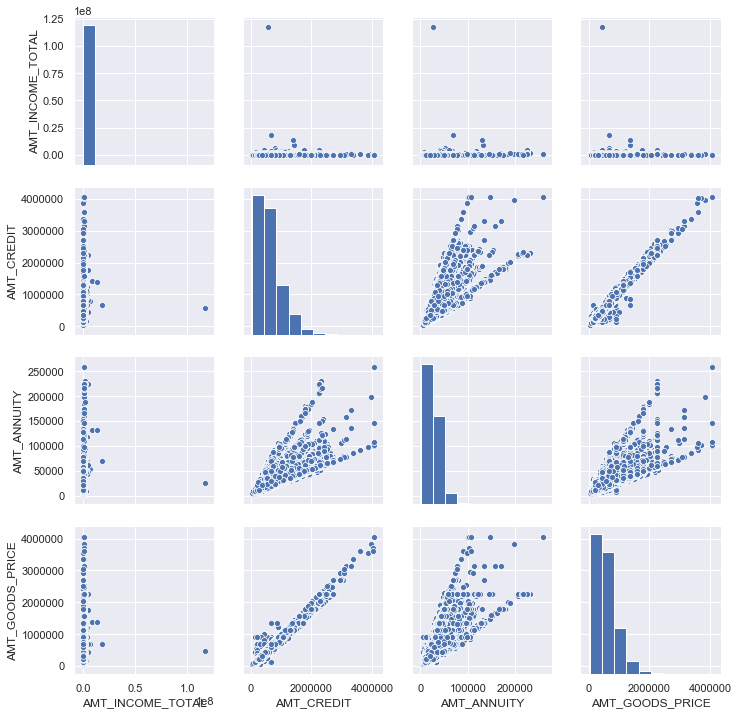

In [516]:
##Pair plot for Imp Continous variables for both defaulters as well as non defaulters.

loan_multivariate = loan[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
DEFAULT_MULTI = loan_multivariate.copy()
DEFAULT_MULTI.info
sns.pairplot(loan_multivariate)

We have created a Pair plot for above mentioned variable.

It is observed that Amount Credit, Annuity and Amount Good price are left-skewed.

For Amount credit with Amnt good price, it follows a linear curve, as and when income increase amnt credit also increase and in this case we can see that non defaulters are also high.

For Amount Annuity to Amount credit, it is not very linear.

### Data Merging from Previous dataset

In [517]:
previous_loan = pd.read_csv('previous_application.csv')

In [518]:
previous_loan.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [519]:
merged_df = loan.merge(previous_loan, on='SK_ID_CURR', suffixes=('_loan','_prev'))

In [520]:
merged_df.shape

(1413701, 74)

#### Univariate Analysis based on Name Contract Status

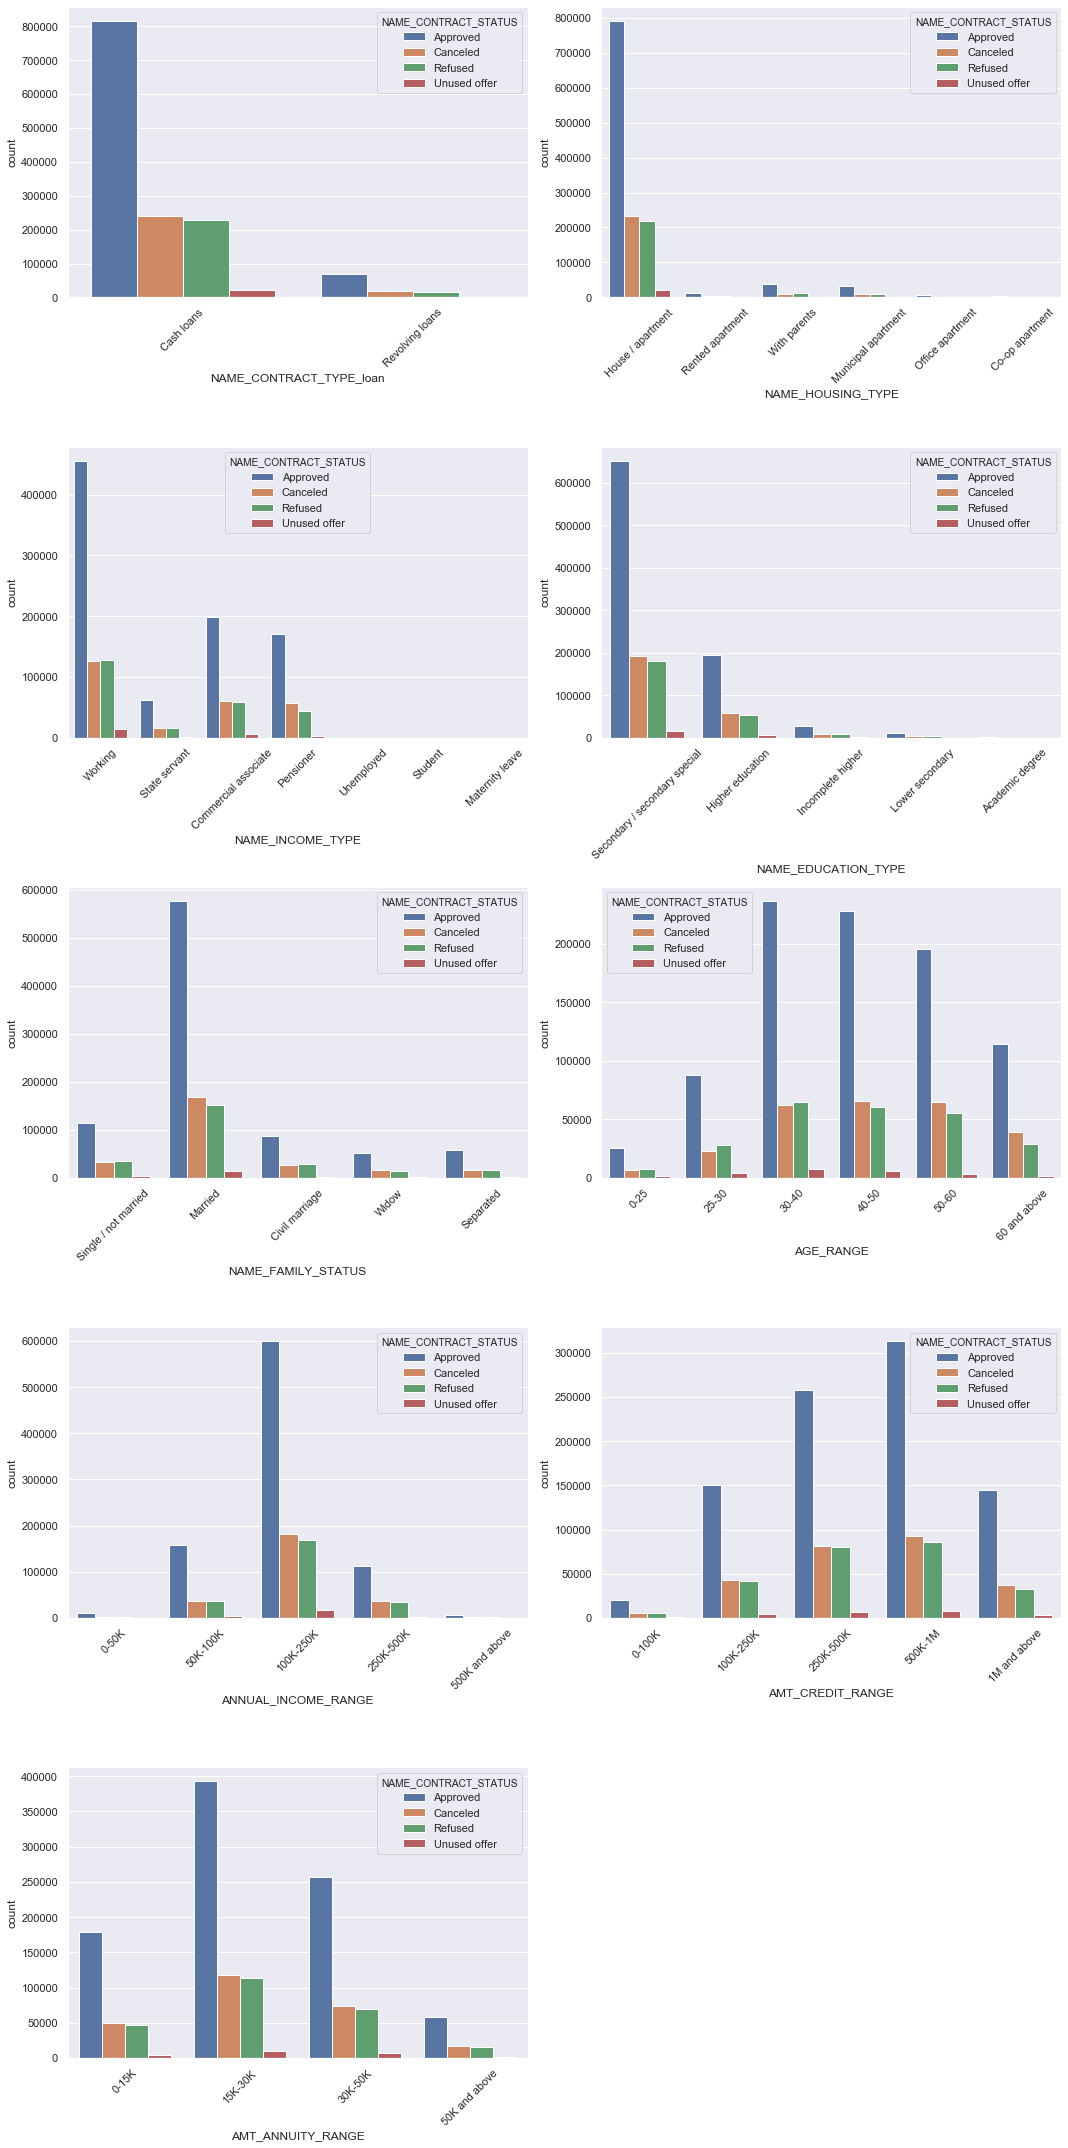

In [521]:
features = ['NAME_CONTRACT_TYPE_loan','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
           'AGE_RANGE','ANNUAL_INCOME_RANGE','AMT_CREDIT_RANGE','AMT_ANNUITY_RANGE']
plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = merged_df)
    plt.xticks(rotation = 45)
    plt.tight_layout()

- From Fig1, it is observed that number of Canceled and Refused loan applications are almost same in case of Cash loans, and chances of loans getting approved is higher in case of Cash Loans.


- In case of Family Status, chances of Loan getting approved is higher if the user is married.


- For Age Range, it is observed that chances of loans approving are higher if a user is in range of 30-40 years and lowest if applicant is under 25.


- For Annual Income, it is seen that, for Applicant having salary of 100-250K, chances of loans getting Approved is higher

### Conclusion

- Target Variable
    - TARGET: Here 1 indicated applicants having higher chances of getting Defaulted whereas 0 indicates applicants very unlikely of getting Defaulted.
 
 
- Top-5 Major variables to consider for loan prediction:
    - Annual Income Range
    - Family Status
    - Amount Credit
    - Name Income Type
    - Age